In [1]:
#Imprtanos librerias para alanizar Dogecoin
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.dates as mdates
%pip install mplfinance
import mplfinance as mpf

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Usuario\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [4]:
df_dogecoin=pd.read_csv(r"C:\Users\Usuario\Documents\Proyecto EDA\src\data\coin_Dogecoin.csv")
print(df_dogecoin.head())

   SNo      Name Symbol                 Date      High       Low      Open  \
0    1  Dogecoin   DOGE  2013-12-16 23:59:59  0.000866  0.000150  0.000299   
1    2  Dogecoin   DOGE  2013-12-17 23:59:59  0.000289  0.000116  0.000207   
2    3  Dogecoin   DOGE  2013-12-18 23:59:59  0.000362  0.000205  0.000267   
3    4  Dogecoin   DOGE  2013-12-19 23:59:59  0.001520  0.000328  0.000395   
4    5  Dogecoin   DOGE  2013-12-20 23:59:59  0.001143  0.000662  0.001143   

      Close  Volume     Marketcap  
0  0.000205     0.0  1.509085e+06  
1  0.000269     0.0  2.169688e+06  
2  0.000362     0.0  3.188943e+06  
3  0.001162     0.0  1.115034e+07  
4  0.000704     0.0  7.284337e+06  


In [5]:
df_dogecoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2760 entries, 0 to 2759
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2760 non-null   int64  
 1   Name       2760 non-null   object 
 2   Symbol     2760 non-null   object 
 3   Date       2760 non-null   object 
 4   High       2760 non-null   float64
 5   Low        2760 non-null   float64
 6   Open       2760 non-null   float64
 7   Close      2760 non-null   float64
 8   Volume     2760 non-null   float64
 9   Marketcap  2760 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 215.8+ KB


In [6]:
df_dogecoin.shape

(2760, 10)

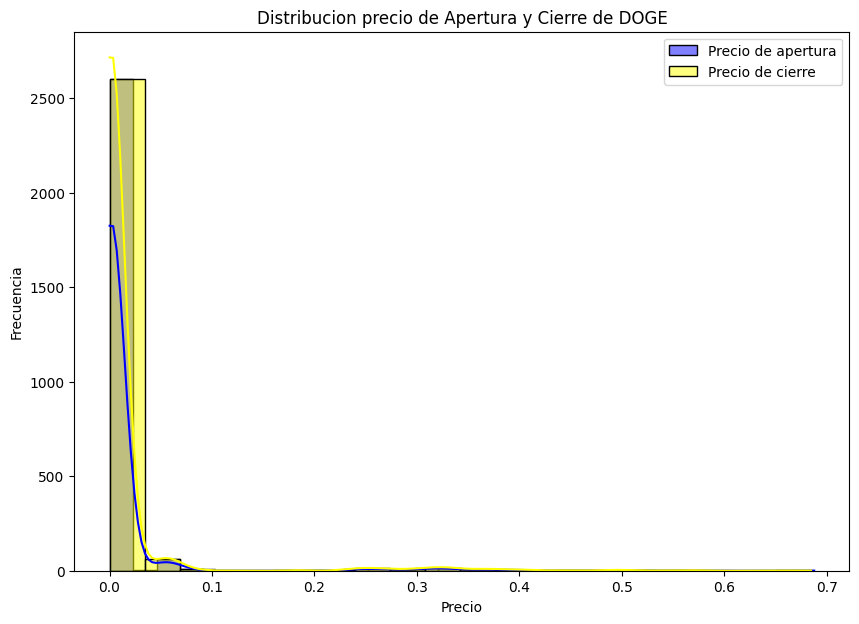

In [7]:
plt.figure(figsize=(10,7))
sns.histplot(df_dogecoin['Open'], bins=30, color='blue',kde=True , label= 'Precio de apertura')
sns.histplot(df_dogecoin['Close'], bins=20, color= 'yellow',kde= True, label='Precio de cierre')
plt.title('Distribucion precio de Apertura y Cierre de DOGE')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

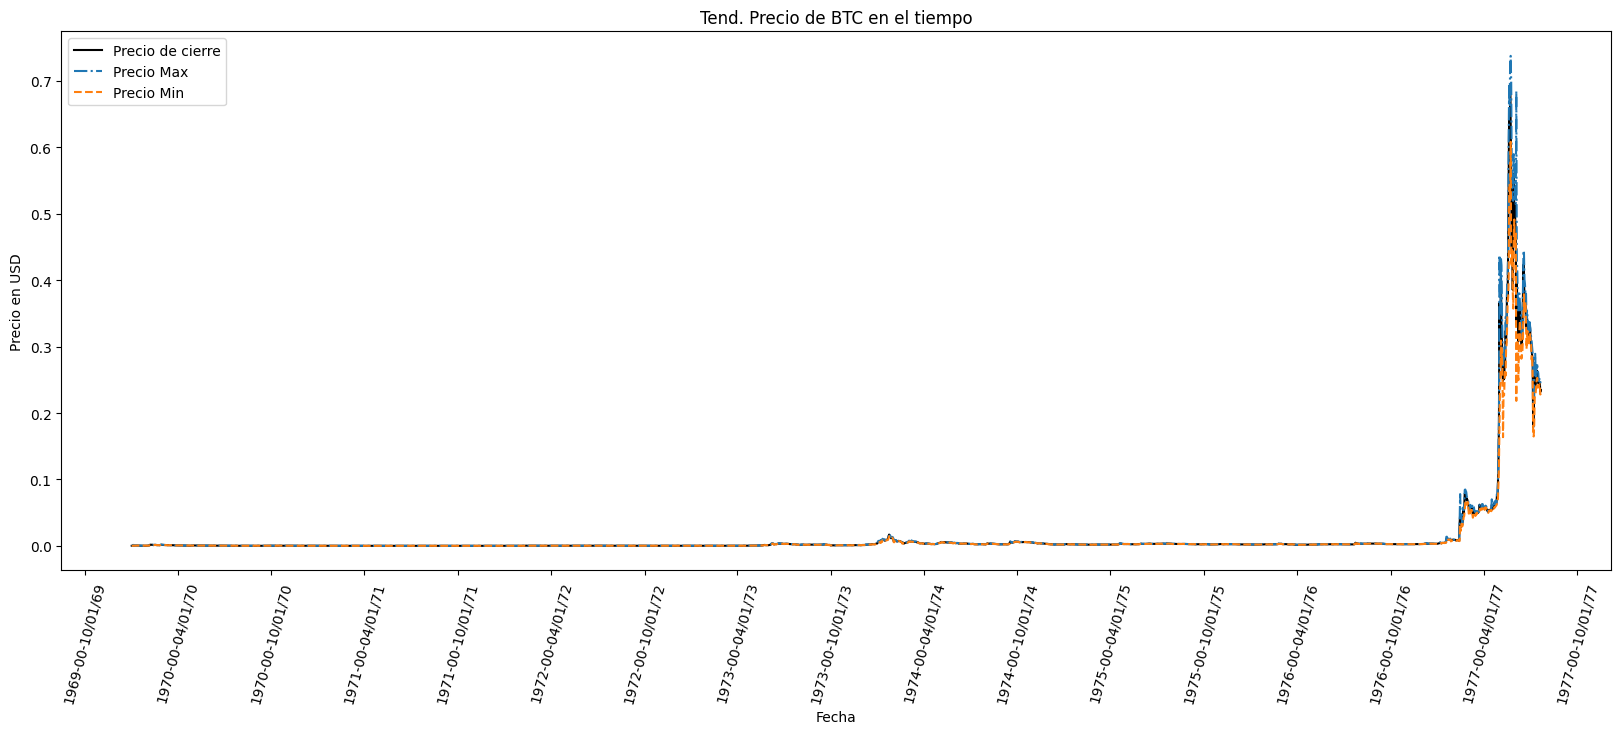

In [8]:
plt.figure(figsize=(20,7))
plt.plot (df_dogecoin['Date'], df_dogecoin ['Close'], color= 'black', label='Precio de cierre') #cambiar color 
plt.plot(df_dogecoin ['Date'], df_dogecoin['High'], label='Precio Max', linestyle='-.')
plt.plot(df_dogecoin['Date'], df_dogecoin['Low'], label='Precio Min', linestyle='--')
plt.title('Tend. Precio de BTC en el tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio en USD')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M-%D'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xticks(rotation=75)
plt.legend()
plt.show()

In [9]:
df_dogecoin['Date']= pd.to_datetime(df_dogecoin['Date'])

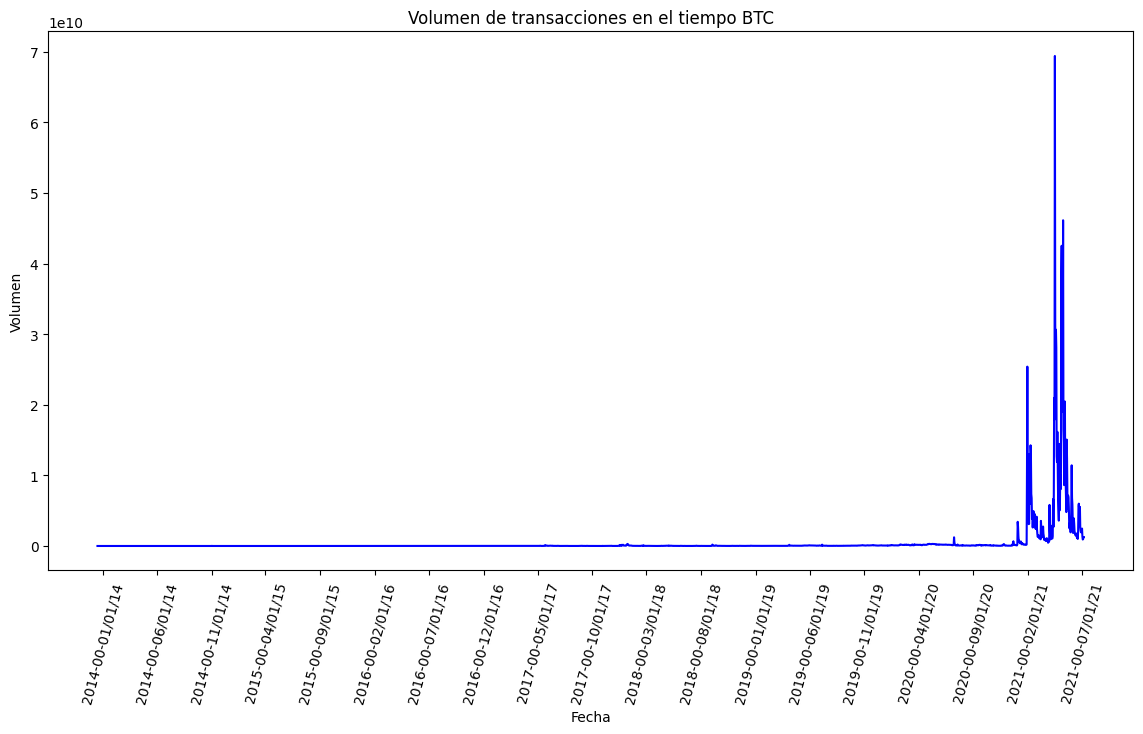

In [10]:
plt.figure(figsize=(14,7))
plt.plot(df_dogecoin['Date'], df_dogecoin['Volume'], color='blue')
plt.title('Volumen de transacciones en el tiempo BTC')
plt.xlabel('Fecha')
plt.ylabel('Volumen')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M-%D'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=5))
plt.xticks(rotation=75)
plt.show()

In [11]:
df_dogecoin['Date']=pd.to_datetime(df_dogecoin['Date'])

In [12]:
df_dogecoin.set_index('Date',inplace=True)

In [13]:
cardano_mensual = df_dogecoin.resample('M').agg({
    'Open': 'first',       # Primer valor del mes.
    'High': 'max',         # Máximo valor del mes.
    'Low': 'min',          # Mínimo valor del mes.
    'Close': 'last',       # Último valor del mes.
    'Volume': 'sum',       # Suma del volumen para el mes.
    'Marketcap': 'last'    # Último valor de la capitalización.
})

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19564\2732765135.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  cardano_mensual = df_dogecoin.resample('M').agg({


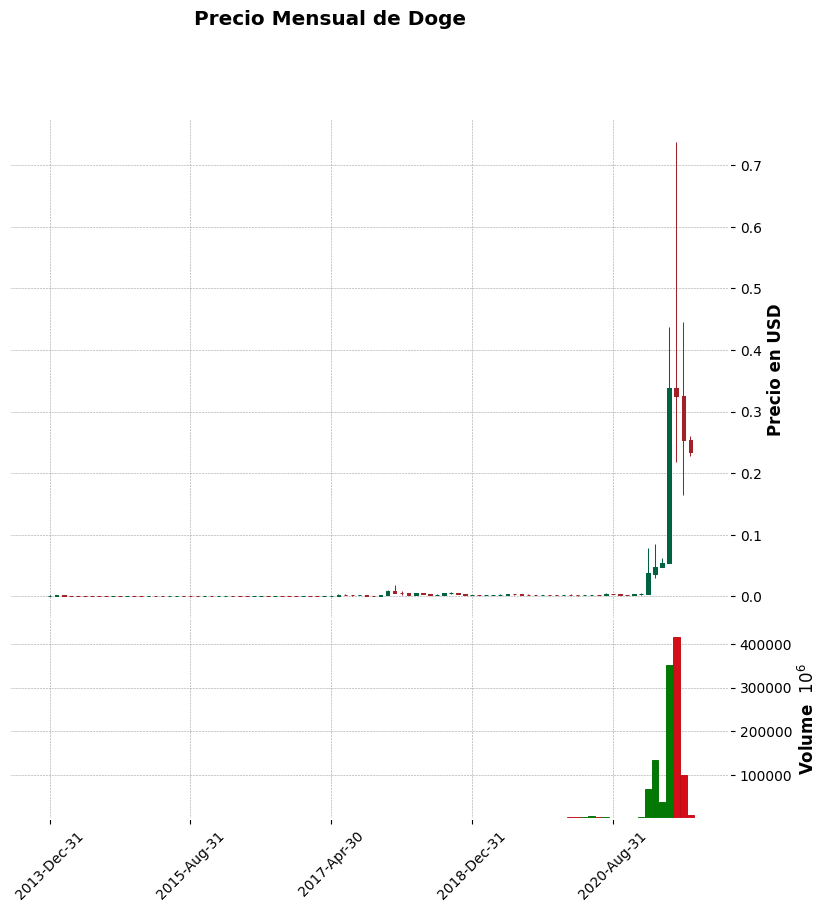

In [15]:
mpf.plot(cardano_mensual, type='candle', style='charles',
         title='Precio Mensual de Doge',
         ylabel='Precio en USD',
         volume=True,
         figsize=(10, 10))